In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zillow-prize-1/properties_2017.csv
/kaggle/input/zillow-prize-1/sample_submission.csv
/kaggle/input/zillow-prize-1/zillow_data_dictionary.xlsx
/kaggle/input/zillow-prize-1/train_2016_v2.csv
/kaggle/input/zillow-prize-1/properties_2016.csv
/kaggle/input/zillow-prize-1/train_2017.csv


In [2]:
train_df = pd.read_csv('../input/zillow-prize-1//train_2017.csv', parse_dates=["transactiondate"])
prop_df = pd.read_csv('../input/zillow-prize-1/properties_2017.csv',low_memory=False)

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# import warnings
# warnings.filterwarnings("ignore")


plt.rcParams['figure.figsize'] = (8.5, 5)
plt.rcParams["patch.force_edgecolor"] = True
sns.mpl.rc("figure", figsize=(8.5,5))
pd.set_option('max_colwidth', 400)

## Data Exploration

In [4]:
train_df.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [5]:
train_df.shape

(77613, 3)

In [6]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [7]:
prop_df.shape

(2985217, 58)

In [8]:
df= train_df.merge(prop_df, how='left', on='parcelid')

In [9]:
df.shape

(77613, 60)

## Data Cleaning

### Log Error:

Observation of the target value

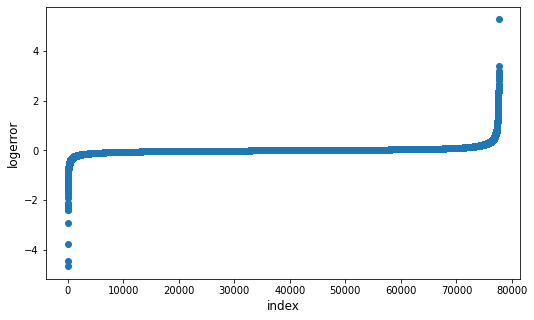

In [10]:
plt.scatter(range(df.shape[0]), np.sort(df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

## Extreme values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


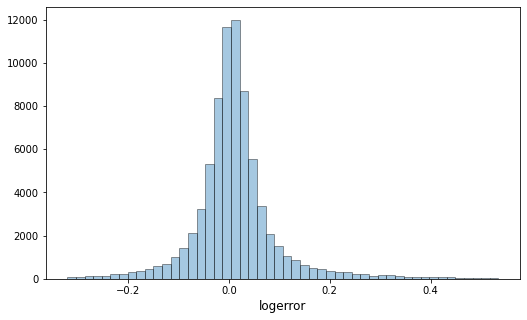

In [11]:
# choose the max and min value 
logerror_max = np.percentile(df.logerror.values, 99)
logerror_min = np.percentile(df.logerror.values, 1)

df = df[df['logerror']<logerror_max]
df = df[df['logerror']>logerror_min]

sns.distplot(df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### Duplicates

In [ ]:
print("Number of the duplicates are ", df.duplicated().sum())

## Missing values

In [13]:
print("Number of the mimssing values are ", df.isna().sum().sum())

Nombre de valeurs manquantes 2129414


In [14]:
# delete columns with missing values > 40%
df = df.loc[:, df.isna().sum() < 0.4*df.shape[0]]

In [15]:
# keep only numeric variabls
df_quant = df.select_dtypes(include=['float64','int64'])

In [16]:
df_nan = df_quant.isna().sum().sort_values()


### Correlation


In [17]:
corr = df_quant.corr()
corr10 = corr['logerror'].abs().sort_values(ascending=False)
corr10.head(11)

logerror                        1.000000
finishedsquarefeet12            0.066625
calculatedfinishedsquarefeet    0.061887
calculatedbathnbr               0.047706
bathroomcnt                     0.046115
fullbathcnt                     0.045264
bedroomcnt                      0.040449
structuretaxvaluedollarcnt      0.029361
taxvaluedollarcnt               0.028136
taxamount                       0.027223
landtaxvaluedollarcnt           0.023456
Name: logerror, dtype: float64

# MACHINE LEARNING

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

In [19]:
def get_metrics(data, target, model):
    ''' 
    Get R2, RMSE and MAE for a model
    data = X
    target = y
    '''
    X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=1)
    model = model
    model.fit(X_train, y_train)
    ytrainpred = model.predict(X_train)
    ytestpred = model.predict(X_test)
    print(model)
    print ("Training set : R2 = {} RMSE = {}\nTesting set : R2 = {} RMSE = {}" 
      .format(round(r2_score(y_train, ytrainpred),3), round(mean_squared_error(y_train, ytrainpred, squared=False),3), round(r2_score(y_test, ytestpred),3), round(mean_squared_error(y_test, ytestpred, squared=False),3)))
    print("Training Set : Mean Absolute Error = {}".format(mean_absolute_error(ytrainpred, y_train)))
    print("Testing Set : Mean Absolute Error = {}".format(mean_absolute_error(ytestpred, y_test)))

In [20]:
# definit target
y = df.logerror

# defniti explanation's variables
df_quant = df_quant.drop(columns = ['logerror'])
X = df_quant

In [21]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))

# Imputation removed column names; put them back
imputed_X.columns = X.columns

X = imputed_X.copy()

## Linear REGRESSION

we can see that there was no linear correlation between of our target and a quantitative variable, I will verify the possible existence of such a correlation with the categorical variables.

In [22]:
df_cat = df[['propertycountylandusecode','propertyzoningdesc']]

In [23]:
new_df_cat = pd.get_dummies(df_cat, prefix=['pcluc', 'pzd'])

In [24]:
new_df_cat.shape

(76059, 1964)

In [25]:
new_df_cat.head()

,pcluc_0100,pcluc_0101,pcluc_0102,pcluc_0103,pcluc_0104,pcluc_0105,pcluc_0108,pcluc_0109,pcluc_010C,pcluc_010D,pcluc_010E,pcluc_010F,pcluc_010G,pcluc_010H,pcluc_010L,pcluc_010M,pcluc_010V,pcluc_0110,pcluc_0111,pcluc_0113,pcluc_0114,pcluc_0115,pcluc_012C,pcluc_012D,pcluc_012E,pcluc_0130,pcluc_0131,pcluc_0133,pcluc_0141,pcluc_01DC,pcluc_01HC,pcluc_01HE,pcluc_0200,pcluc_0201,pcluc_0203,pcluc_0204,pcluc_020E,pcluc_020G,pcluc_020M,pcluc_0300,pcluc_0301,pcluc_030G,pcluc_0400,pcluc_0401,pcluc_040B,pcluc_040G,pcluc_040V,pcluc_0700,pcluc_070D,pcluc_1,pcluc_1110,pcluc_1111,pcluc_1112,pcluc_1116,pcluc_1117,pcluc_1120,pcluc_1128,pcluc_1129,pcluc_1210,pcluc_122,pcluc_1222,pcluc_1310,pcluc_1321,pcluc_1333,pcluc_135,pcluc_1410,pcluc_1421,pcluc_1432,pcluc_1720,pcluc_1722,pcluc_34,pcluc_38,pcluc_73,pcluc_96,pzd_1NR1*,pzd_1NR3*,pzd_AH RM-CD*,pzd_AH RM-CD-F,pzd_AH RS-(3)-,pzd_AHA11*,pzd_AHPPD1O*,pzd_AHPRD10*,pzd_AHR110000*,pzd_AHR115000*,pzd_AHR17000*,pzd_AHR17000-C,pzd_AHR17500*,pzd_AHR26250*,pzd_AHR3*,pzd_AHR3-R325U,pzd_AHR335U*,pzd_AHRA10000*,pzd_AHRA20000*,pzd_AHRA2OOOO*,pzd_AHRH-OA-FC,pzd_AHRPD10*,pzd_AHRPD10000,pzd_AHRPD11.6U,pzd_AHRPD15000,pzd_AHRPD1O*,pzd_AHRPD51U*,pzd_AHRPD51U-R,pzd_AHRPD70005,pzd_AHRPD70006,pzd_AHRPD75009,pzd_AHRS-(3)10,pzd_AHRS-2-200,pzd_ALCBD/DRD*,pzd_ALCP,pzd_ALCPD*,pzd_ALCPD-RPD*,pzd_ALR1*,pzd_ALR17500*,pzd_ALR1YY,pzd_ALR3*,pzd_ALRPD*,pzd_ARR 2,pzd_ARR0*,pzd_ARR015,pzd_ARR0YY,pzd_ARR1*,pzd_ARR105,pzd_ARR110000*,pzd_ARR110000D,pzd_ARR11000D*,pzd_ARR112500*,pzd_ARR175,pzd_ARR17500*,pzd_ARR1D*,pzd_ARR1YY,pzd_ARR2*,pzd_ARR2YY,pzd_ARR3*,pzd_ARR3H*,pzd_ARR3HV,pzd_ARR3HY,pzd_ARR3PH*,pzd_ARR3YY,pzd_ARRO*,pzd_ARRO30000&,pzd_ARROD*,pzd_ATA10000*,pzd_ATCO*,pzd_ATM1*,pzd_ATM1-CG*,pzd_ATMR1800*,pzd_ATMRV*,pzd_ATR16000*,pzd_AVM3*,pzd_AVR2*,pzd_AVR3*,pzd_AVU*,pzd_AZC2YY,pzd_AZC3*,pzd_AZCBD*,pzd_AZCFR3BC2*,pzd_AZM2*,pzd_AZP*,pzd_AZPYYY,pzd_AZR1,pzd_AZR1*,pzd_AZR1A*,pzd_AZR1AY,pzd_AZR1B*,pzd_AZR1BY,pzd_AZR1C*,pzd_AZR1C6000*,pzd_AZR1CY,pzd_AZR1YY,pzd_AZR2-RIA*,pzd_AZR2YY,pzd_AZR3*,pzd_AZR3A*,pzd_AZR3B*,pzd_AZR3B-CF*,pzd_AZR3C*,pzd_AZR3C1200*,pzd_AZRA,pzd_AZRA20000*,pzd_AZRZ,pzd_AZW*,pzd_AZW-CF*,pzd_B F R 2,pzd_BFA1*,pzd_BFA106,pzd_BFA15000*,pzd_BFA16000*,pzd_BFA1YY,pzd_BFCG,pzd_BFCG&TC*,pzd_BFCG*,pzd_BFCG-R1*,pzd_BFER3*,pzd_BFR1*,pzd_BFR105,pzd_BFR105000*,pzd_BFR106,pzd_BFR15000*,pzd_BFR16000*,pzd_BFR1YY,pzd_BFR2*,pzd_BFR2PD*,pzd_BFR3*,pzd_BFR3PD*,pzd_BGA1*,pzd_BGC4-R3PD*,pzd_BGCM*,pzd_BGCMHPD*,pzd_BGM1*,pzd_BGR2*,pzd_BGR3*,pzd_BGR3HPD*,pzd_BGR3PD*,pzd_BHC3,pzd_BHR1*,pzd_BHR1YY,pzd_BHR4,pzd_BHR4*,pzd_BHR475,pzd_BHR475*,pzd_BHR4YY,pzd_BLC3R*,pzd_BLR1*,pzd_BLR1YY,pzd_BLR2*,pzd_BLR2YY,pzd_BLR3*,pzd_BLR3YY,pzd_BPC1*,pzd_BPI*,pzd_BPR1,pzd_BPR1*,pzd_BPR1YY,pzd_BPR3,pzd_BPR3*,pzd_BPR3PD*,pzd_BPRG*,pzd_BRA1*,pzd_BRA2*,pzd_BRR120000*,pzd_BRR17500*,pzd_BUC1*,pzd_BUC4,pzd_BUM2*,pzd_BUR-1*,pzd_BUR-3,pzd_BUR1*,pzd_BUR1-1*,pzd_BUR15000*,pzd_BUR1H*,pzd_BUR1HY,pzd_BUR1YY,pzd_BUR2*,pzd_BUR3*,pzd_BUR4,pzd_BUR4*,pzd_BUR4-C2-C3,pzd_BUR5*,pzd_BURBANK R-,pzd_CA&MUR&D*,pzd_CARM12U&D*,pzd_CARM18U&D*,pzd_CARM25U&D*,pzd_CARM25U*,pzd_CARM8U&D*,pzd_CARS*,pzd_CASP-4*,pzd_CASP-6*,pzd_CASP-7*,pzd_CASP-9*,pzd_CC-R3,pzd_CCC3,pzd_CCC3*,pzd_CCPD*,pzd_CCR-1*,pzd_CCR1*,pzd_CCR1AY,pzd_CCR1YY,pzd_CCR1Z*,pzd_CCR2*,pzd_CCR2YY,pzd_CCR3*,pzd_CCR3A*,pzd_CCR4*,pzd_CCR4YY,pzd_CEADP11,pzd_CEADP3,pzd_CEADP4,pzd_CEADP6,pzd_CEADP7,pzd_CEADP8,pzd_CECC,pzd_CERM,pzd_CERS5000,pzd_CERS6500,pzd_CL,pzd_CLCH,pzd_CLCP,pzd_CLCP*,pzd_CLCP-E*,pzd_CLHC,pzd_CLHC*,pzd_CLI-,pzd_CLR18000*,pzd_CLRA1*,pzd_CLRM*,pzd_CLRM2000*,pzd_CLRM3000*,pzd_CLRM4000*,pzd_CLRM4000-R,pzd_CLRS*,pzd_CLRS1000*,pzd_CLRS10000*,pzd_CLRS13000&,pzd_CLRS13000*,pzd_CLRS20000*,pzd_CLRS8000*,pzd_CLSP2*,pzd_CMR1*,pzd_CMR1YY,pzd_CMR2*,pzd_CMR2YY,pzd_CMR3,pzd_CMR3*,pzd_CMR3YY,pzd_COCL*,pzd_COCM*,pzd_COML,pzd_COML*,pzd_COPR3*,pzd_COPRH*,pzd_COPRL*,pzd_COPRM*,pzd_COR1*,pzd_COR1YY,pzd_COR2*,pzd_COR3*,pzd_COR3YY,pzd_CORA*,pzd_CORAYY,pzd_CORH*,pzd_CORL,pzd_CORL*,pzd_CORM*,pzd_COUNT ON #,pzd_CSRS,pzd_CSRS*,pzd_CUR 3,pzd_CUR03000*,pzd_CUR

### Multiple linear regression with Ridge regulation

In [26]:
from sklearn import linear_model
regr = linear_model.Ridge(alpha=100)
get_metrics(new_df_cat, y, regr)

Ridge(alpha=100)
Training set : R2 = 0.011 RMSE = 0.085
Testing set : R2 = 0.005 RMSE = 0.086
Training Set : Mean Absolute Error = 0.053661005117089225
Testing Set : Mean Absolute Error = 0.054054543400849024


these categorical variables do not have enough correlation with logerror to be relevant

## DecisionTreeRegression 

I use this model to define which are the most useful variables for the prediction.

In [27]:
get_metrics(X, y, DecisionTreeRegressor(random_state=1))

DecisionTreeRegressor(random_state=1)
Training set : R2 = 0.995 RMSE = 0.006
Testing set : R2 = -1.133 RMSE = 0.126
Training Set : Mean Absolute Error = 0.0002544160286915198
Testing Set : Mean Absolute Error = 0.08448915460824515


## RANDOMFOREST

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
ytrainpred = model.predict(X_train)
ytestpred = model.predict(X_test)
print(model)
print ("Training set : R2 = {} RMSE = {}\nTesting set : R2 = {} RMSE = {}" .format(round(r2_score(y_train, ytrainpred),3), round(mean_squared_error(y_train, ytrainpred, squared=False),3), round(r2_score(y_test, ytestpred),3), round(mean_squared_error(y_test, ytestpred, squared=False),3)))
print("Training Set : Mean Absolute Error = {}".format(mean_absolute_error(ytrainpred, y_train)))
print("Testing Set : Mean Absolute Error = {}".format(mean_absolute_error(ytestpred, y_test)))

RandomForestRegressor(random_state=1)
Training set : R2 = 0.853 RMSE = 0.033
Testing set : R2 = -0.028 RMSE = 0.088
Training Set : Mean Absolute Error = 0.02101341574899587
Testing Set : Mean Absolute Error = 0.05619780845640367


In [29]:
a = model.feature_importances_
np.sort(a)  

array([0.        , 0.00044646, 0.00064627, 0.00359422, 0.00649711,
       0.00651438, 0.00655367, 0.00752467, 0.00787411, 0.00861463,
       0.01579774, 0.02064321, 0.02485399, 0.02529352, 0.02766133,
       0.04348533, 0.05149411, 0.05983481, 0.06131688, 0.06755129,
       0.0725006 , 0.0734113 , 0.07500661, 0.07788973, 0.07993899,
       0.08519277, 0.08986226])

In [30]:
name = X.columns
corr = model.feature_importances_
df = pd.DataFrame({'name':name, 'corr':corr})
df.sort_values(by='corr', ascending = False)
# df.plot('name', 'corr', kind='scatter')

,name,corr
21,structuretaxvaluedollarcnt,0.089862
12,lotsizesquarefeet,0.085193
0,parcelid,0.079939
10,latitude,0.077890
11,longitude,0.075007
24,landtaxvaluedollarcnt,0.073411
25,taxamount,0.072501
20,yearbuilt,0.067551
22,taxvaluedollarcnt,0.061317
5,calculatedfinishedsquarefeet,0.059835


## XGBOOST

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)
Training score:  0.22629178083138257
Mean cross-validation score: -0.02
K-fold CV average score: -0.02
MSE: 0.01
RMSE: 0.09


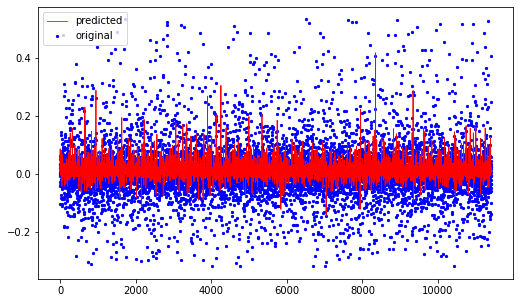

In [31]:

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain) 

score = xgbr.score(xtrain, ytrain)   

print("Training score: ", score)  

# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean()) 

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))


x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [32]:
print("Training Set : Mean Absolute Error = {}".format(mean_absolute_error(ytrainpred, y_train)))
print("Testing Set : Mean Absolute Error = {}".format(mean_absolute_error(ytestpred, y_test)))

Training Set : Mean Absolute Error = 0.02101341574899587
Testing Set : Mean Absolute Error = 0.05619780845640367


# SUBMISSION

In [33]:
# read the sample_submisison file into a dataframe, for sake of clarity let's limit the number of rows to 5
df_samples = pd.read_csv('../input/zillow-prize-1/sample_submission.csv')

In [34]:
# let's unpivot the dataframe to produce the shape regression models usually expect
# consisting of pairs `parcelid`, `transactiondate``

def reshape_for_model(df):
    """Unipivot the submission data and apply some renamings"""
    df = pd.melt(df, ['ParcelId'])
    df.drop('value', axis=1, inplace=True)
    df.columns = ['parcelid', 'transactiondate']
    df['transactiondate'] = df['transactiondate'].apply(
        lambda date_str: "%s-%s-01" %(date_str[:4], date_str[-2:]))
    return df

In [35]:
df_reshaped = reshape_for_model(df_samples)

In [36]:
X.columns
new_df = prop_df[['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock']]


# new_df = new_df.sample(n=10000)


In [37]:

p_1 = xgbr.predict(new_df)
p_2 = xgbr.predict(new_df)
p_3 = xgbr.predict(new_df)
p_4 = xgbr.predict(new_df)
p_5 = xgbr.predict(new_df)
p_6 = xgbr.predict(new_df)


In [38]:
pred = np.concatenate((p_1, p_2, p_3, p_4, p_5, p_6), axis=None)

In [39]:
df_reshaped['prediction']  = pred

In [40]:
###### to get the original shape of our submission sample file, we can now pivot the table again
# and remove the column names
def reshape_for_submission(df):
    """Reformat the transactiondate and pivot the data"""
    df['transactiondate'] = df['transactiondate'].apply(lambda td: "%s%s" %(td[:4],td[5:7]))
    df = df.pivot(index='parcelid', columns='transactiondate', values='prediction')
    df = df.reset_index()
#     df = df.rename_axis(None,1)
    df = df.rename(index=str, columns={"parcelid": "ParcelId"})
    return df

In [41]:
df_tosubmit = reshape_for_submission(df_reshaped)

In [42]:
df_tosubmit.head()

transactiondate,ParcelId,201610,201611,201612,201710,201711,201712
0,10711725,0.133156,0.133156,0.133156,0.133156,0.133156,0.133156
1,10711726,0.016762,0.016762,0.016762,0.016762,0.016762,0.016762
2,10711727,0.007126,0.007126,0.007126,0.007126,0.007126,0.007126
3,10711728,0.015235,0.015235,0.015235,0.015235,0.015235,0.015235
4,10711729,0.001341,0.001341,0.001341,0.001341,0.001341,0.001341


In [43]:
df_tosubmit.to_csv('final.csv',index = False)